In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2021-12-31'
df = data.DataReader('TSLA','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [3]:
df = df.reset_index()

In [4]:
df = df.drop(['Adj Close','Volume'],axis=1)

In [5]:
df.head()

,Date,High,Low,Open,Close
0,2010-06-29,5.000,3.508,3.800,4.778
1,2010-06-30,6.084,4.660,5.158,4.766
2,2010-07-01,5.184,4.054,5.000,4.392
3,2010-07-02,4.620,3.742,4.600,3.840
4,2010-07-06,4.000,3.166,4.000,3.222


In [6]:
mma100 = df.Close.rolling(100).mean()
mma200 = df.Close.rolling(200).mean()

In [57]:
mma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2894    893.110598
2895    896.848997
2896    900.719897
2897    904.285696
2898    907.753597
Name: Close, Length: 2899, dtype: float64

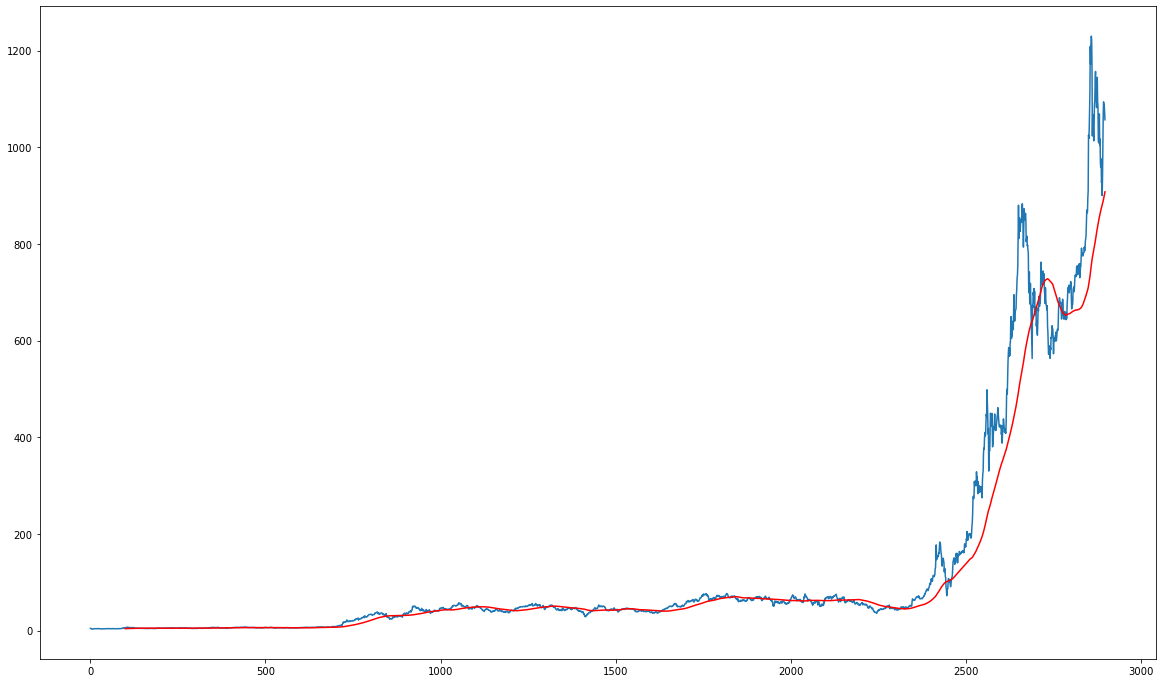

In [7]:
plt.figure(figsize=(20,12))
plt.plot(df.Close)
plt.plot(mma100,'r')

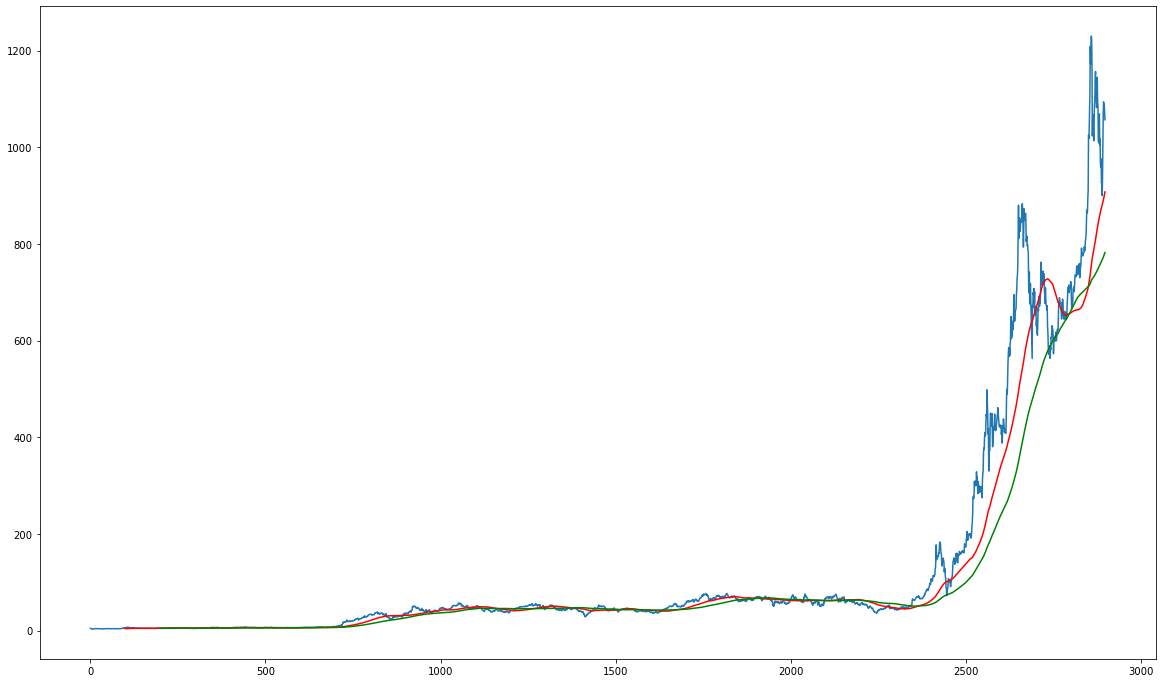

In [8]:
plt.figure(figsize=(20,12))
plt.plot(df.Close)
plt.plot(mma100,'r')
plt.plot(mma200,'g')

In [11]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(2029, 1)
(870, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_testing_array = scaler.fit_transform(data_testing)


In [15]:
x_train = []
y_train = [] 


for i in range(100,data_testing_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [18]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [71]:
y_train[0]

0.03816359806983887

In [19]:
#ML MODEL
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [34]:
(x_train.shape[1],1)

(100, 1)

In [21]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120,activation='relu',return_sequences=False,))
model.add(Dropout(0.4))

model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_3 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)               86880     
                                                                 
 dropout_4 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 8s 132ms/step - loss: 0.0094
Epoch 2/50
25/25 [==============================] - 3s 122ms/step - loss: 0.0052
Epoch 3/50
25/25 [==============================] - 3s 122ms/step - loss: 0.0016
Epoch 4/50
25/25 [==============================] - 3s 124ms/step - loss: 0.0010
Epoch 5/50
25/25 [==============================] - 3s 126ms/step - loss: 0.0010
Epoch 6/50
25/25 [==============================] - 3s 123ms/step - loss: 0.0011
Epoch 7/50
25/25 [==============================] - 3s 124ms/step - loss: 0.0011
Epoch 8/50
25/25 [==============================] - 3s 124ms/step - loss: 8.9821e-04
Epoch 9/50
25/25 [==============================] - 3s 119ms/step - loss: 8.6552e-04
Epoch 10/50
25/25 [==============================] - 3s 120ms/step - loss: 8.9808e-04
Epoch 11/50
25/25 [==============================] - 3s 121ms/step - loss: 7.6881e-04
Epoch 12/50
25/25 [==============================] - 3s 119ms/step - loss: 0.0011
Epoch 13/

In [23]:
model.save('keras_model.h5')

In [68]:
past_100_days

,Close
1929,70.197998
1930,68.612000
1931,66.185997
1932,67.024002
1933,66.669998
...,...
2024,63.773998
2025,62.020000
2026,64.538002
2027,64.769997


In [46]:
past_100_days= data_training.tail(100)
final_df = past_100_days.append(data_testing,ignore_index=True)

In [47]:
final_df.head()

,Close
0,70.197998
1,68.612000
2,66.185997
3,67.024002
4,66.669998


In [48]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(970, 1)

In [49]:
x_test =[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [50]:
x_test,y_test = np.array(x_train),np.array(y_train)
print(x_test.shape)
print(y_test.shape)

(770, 100, 1)
(770,)


In [51]:
x_test.shape

(770, 100, 1)

In [52]:
y_predicted = model.predict(x_test)

In [53]:
y_predicted.shape

(770, 1)

In [54]:
scaler.scale_

array([0.00083744])

In [55]:
scale_factor =  1/0.00083744 
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

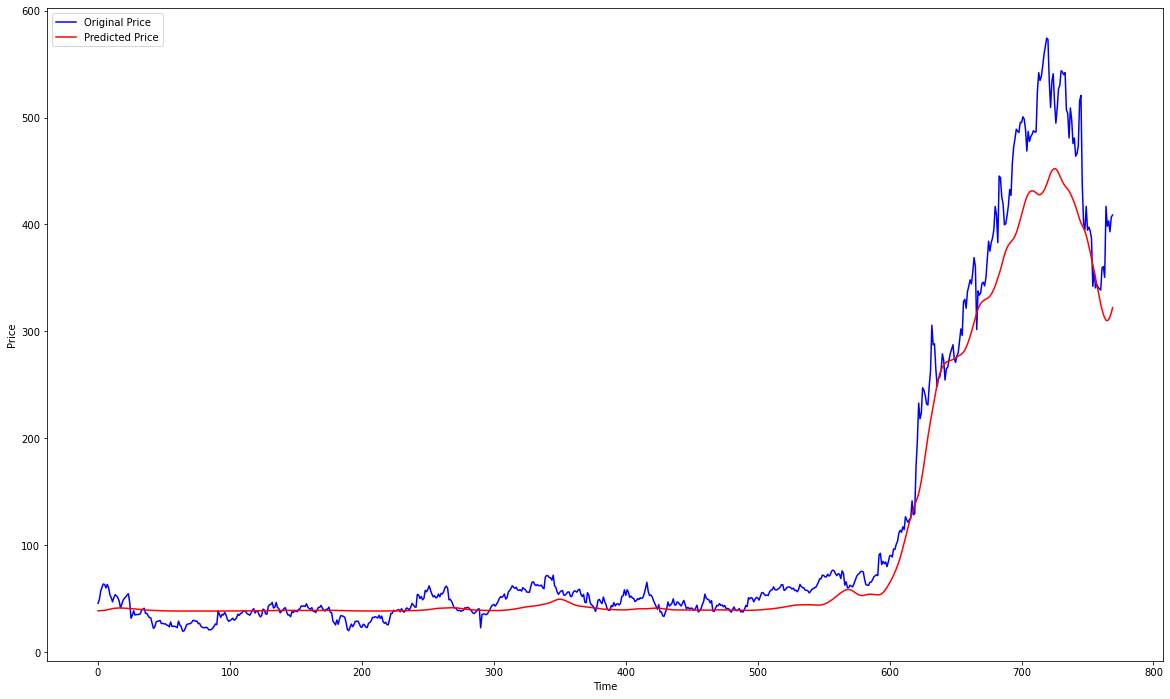

In [56]:
plt.figure(figsize=(20,12))
plt.plot(y_test,'b',label="Original Price")
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [66]:
y_predicted = [ x[0] for x in y_predicted]

In [67]:
y_predicted

[38.507545,
 38.5742,
 38.648983,
 38.743614,
 38.86566,
 39.023205,
 39.229336,
 39.473446,
 39.750683,
 40.050507,
 40.343365,
 40.602962,
 40.80674,
 40.95709,
 41.066067,
 41.1407,
 41.183304,
 41.190983,
 41.152905,
 41.07734,
 40.9798,
 40.87546,
 40.776424,
 40.693405,
 40.633778,
 40.582024,
 40.504963,
 40.39558,
 40.269825,
 40.132347,
 39.992718,
 39.853424,
 39.717278,
 39.58716,
 39.4674,
 39.361034,
 39.26976,
 39.190334,
 39.12064,
 39.057636,
 38.998955,
 38.943398,
 38.88905,
 38.83494,
 38.78133,
 38.729607,
 38.680927,
 38.636105,
 38.59571,
 38.5593,
 38.526634,
 38.49741,
 38.471405,
 38.448357,
 38.428024,
 38.410126,
 38.394882,
 38.381798,
 38.370525,
 38.360806,
 38.35242,
 38.345142,
 38.339447,
 38.334866,
 38.331066,
 38.327633,
 38.324375,
 38.321323,
 38.318645,
 38.31645,
 38.314766,
 38.313576,
 38.313015,
 38.31348,
 38.31502,
 38.31728,
 38.320026,
 38.32259,
 38.324696,
 38.326084,
 38.326653,
 38.326458,
 38.325634,
 38.32436,
 38.32275,
 38.32086,
 